<a href="https://colab.research.google.com/github/SharlotteManganye/Deep-Learning-CNN/blob/main/MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# visualization tools
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
from torchvision.transforms import ToTensor
from torch import optim

Load MNIST dataset both train and test

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 36638007.04it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1026069.34it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8976594.29it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8158684.70it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)

In [4]:
#parameter
input_size=784
hidden_size=400
output_size=10
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size , hidden_size)  # Adjust the input_size
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)
        # Pass through the first linear layer and apply activation function
        x = self.relu(self.fc1(x))
        # Pass through the second linear layer
        x = self.relu(self.fc2(x))
        # Pass through the third linear layer
        x = self.fc3(x)
        return x


In [5]:

model = MLP(input_size, hidden_size, output_size)

In [6]:
model.parameters


<bound method Module.parameters of MLP(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=10, bias=True)
)>

In [7]:
# loss function
loss_func = nn.CrossEntropyLoss()

In [8]:
# Adam optimizer
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

Training

In [9]:
def train(epoch):

    # Setting model in training mode.
    model.train()

    train_loss = 0
    train_acc = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        #clear gradient
        optimizer.zero_grad()

        #FP (make a prediction)
        output = model(data.float())

        # calculating the loss
        loss = loss_func(output, target)

        #BP, Computing the gradient of the loss w.r.t the parameters of the model
        loss.backward()

        # a single step of optimization, update parameters
        optimizer.step()

        train_loss += loss.item()

        _, pred = output.max(1)
        train_acc += target.eq(pred).sum().item()

    train_acc /= len(train_loader.dataset)
    train_loss /= (batch_idx + 1) # Average per batch

    return train_loss, train_acc

Validation

In [10]:
def val():
    # setting model in evaluation mode.
    model.eval()

    val_loss = 0
    val_acc = 0

    # no gradient is needed
    # when calling a PyTorch neural network to compute output during TRAINING, you should NEVER use the no_grad() statement,
    # but when NOT TRAINING, using the no_grad() statement is optional but more principled.
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):

            #FP
            output = model(data.float())

            # loss
            val_loss += loss_func(output, target).item()
            _, pred = output.max(1)
            val_acc += target.eq(pred).sum().item()

    val_loss /= (batch_idx + 1) # Average per batch
    val_acc /= len(test_loader.dataset)

    return val_loss, val_acc


In [11]:
loss_list = []
val_loss_list = []

acc_list = []
val_acc_list = []

epochs = 10
for epoch in range(1, epochs + 1):
    print("--- Epoch {} ---".format(epoch))

    train_loss, train_acc = train(epoch)
    print('\tTrain loss: {:.4f}, acc: {:.4f}%'.format(train_loss, train_acc))
    loss_list.append(train_loss)
    acc_list.append(train_acc)

    val_loss, val_acc =  val()
    print('\tVal loss: {:.4f}, acc: {:.4f}%'.format(val_loss, val_acc))
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

--- Epoch 1 ---


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


	Train loss: 0.2649, acc: 0.9231%
	Val loss: 0.1286, acc: 0.9605%
--- Epoch 2 ---
	Train loss: 0.0977, acc: 0.9706%
	Val loss: 0.0915, acc: 0.9705%
--- Epoch 3 ---
	Train loss: 0.0625, acc: 0.9806%
	Val loss: 0.0845, acc: 0.9729%
--- Epoch 4 ---
	Train loss: 0.0456, acc: 0.9852%
	Val loss: 0.0773, acc: 0.9778%
--- Epoch 5 ---
	Train loss: 0.0323, acc: 0.9895%
	Val loss: 0.0795, acc: 0.9766%
--- Epoch 6 ---
	Train loss: 0.0304, acc: 0.9895%
	Val loss: 0.0700, acc: 0.9800%
--- Epoch 7 ---
	Train loss: 0.0207, acc: 0.9935%
	Val loss: 0.0732, acc: 0.9801%
--- Epoch 8 ---
	Train loss: 0.0182, acc: 0.9934%
	Val loss: 0.0797, acc: 0.9795%
--- Epoch 9 ---
	Train loss: 0.0176, acc: 0.9941%
	Val loss: 0.0737, acc: 0.9803%
--- Epoch 10 ---
	Train loss: 0.0161, acc: 0.9944%
	Val loss: 0.0833, acc: 0.9794%


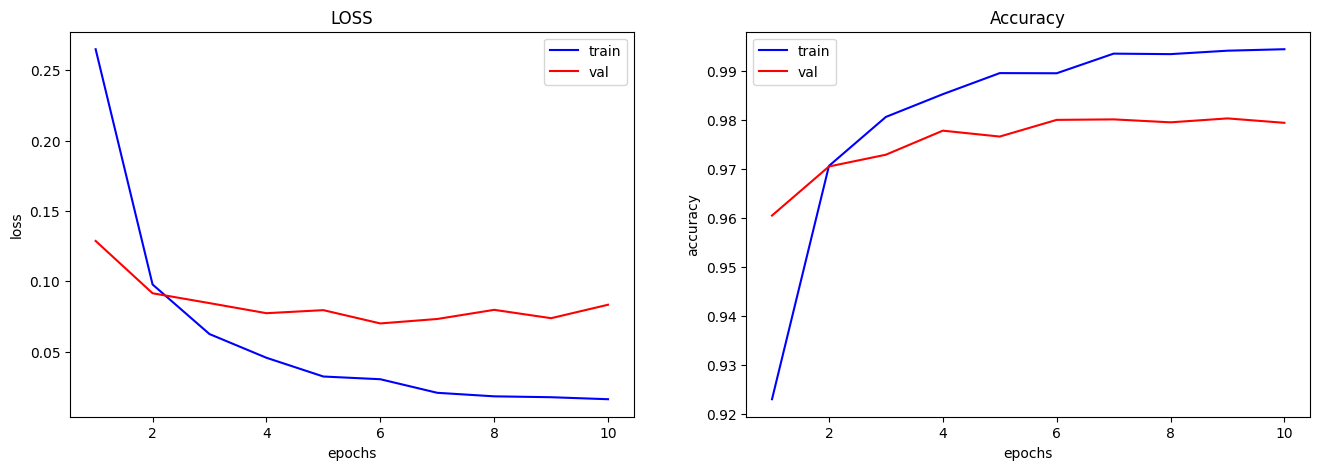

In [15]:
# plot


x = range(1, epochs + 1)

plt.figure(figsize=(16, 5))

#loss
plt.subplot(1,2,1)
plt.plot(x, loss_list, 'b', label = 'train')
plt.plot(x, val_loss_list, 'r', label = 'val')
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(x, acc_list, 'b', label = 'train')
plt.plot(x, val_acc_list, 'r', label = 'val')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
